### 1. Read the data
#### 1.1 Delete the outliers

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 300)

In [3]:
train_df = pd.read_csv('./data/train.csv')
print(train_df.shape)
train_df.head(3)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
test_df = pd.read_csv('./data/test.csv')
print(test_df.shape)
test_df.head(3)

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


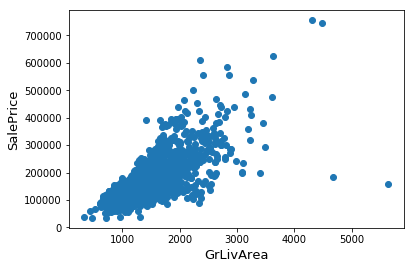

In [5]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['GrLivArea'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

# this jupyter notebook didn't drop the two outliers

In [6]:
# Save the 'Id' column and drop them in the df's
train_ID = train_df['Id']
test_ID = test_df['Id']
train_df.drop("Id", axis = 1, inplace = True)
test_df.drop("Id", axis = 1, inplace = True)
print(train_df.shape)  # (1460, 80)
print(test_df.shape)   # (1459, 79)

(1460, 80)
(1459, 79)


#### 1.2 Transformation: Skewness

C:\Users\Xu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


mu = 180921.19589041095 and sigma = 79415.29188606751



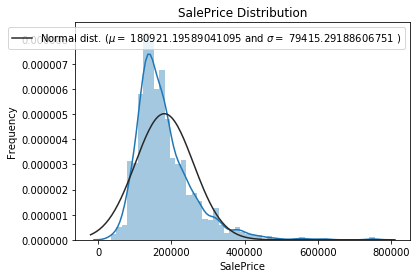

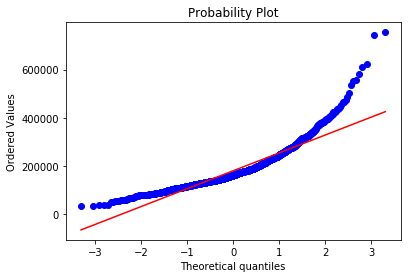

In [7]:
sns.distplot(train_df['SalePrice'] , fit=norm)
(mu, sigma) = norm.fit(train_df['SalePrice'])
# print('mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
print('mu = {} and sigma = {}\n'.format(mu, sigma))

# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.legend(['Normal dist. ($\mu=$ {} and $\sigma=$ {} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()

C:\Users\Xu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


mu = 180921.19589041095 and sigma = 79415.29188606751



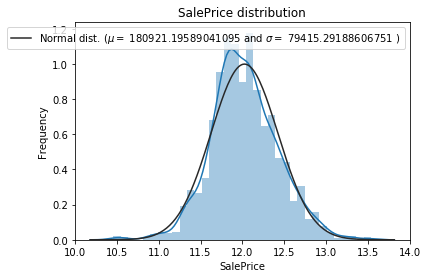

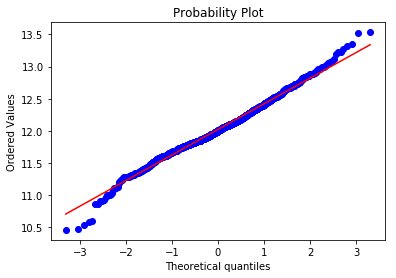

In [8]:
sns.distplot(np.log(train_df['SalePrice']) , fit=norm)
(mu, sigma) = norm.fit(train_df['SalePrice'])
print( 'mu = {} and sigma = {}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {} and $\sigma=$ {} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(np.log(train_df['SalePrice']), plot=plt)
plt.show()

In [9]:
train_df['LogSalePrice'] = np.log(train_df['SalePrice'])
train_df.shape

(1460, 81)

In [10]:
y_train = train_df['LogSalePrice']
y_train0 = train_df['SalePrice']
X_train = train_df.drop('LogSalePrice', axis=1)
X_train = X_train.drop('SalePrice', axis=1)
X_test = test_df.copy()

In [11]:
print(y_train0.shape, y_train.shape)
print(X_train.shape)
print(X_test.shape)

(1460,) (1460,)
(1460, 79)
(1459, 79)


In [12]:
all_data = pd.concat([X_train, X_test], ignore_index=True)
all_data.shape

(2919, 79)

In [56]:
del X_train, X_test

In [13]:
all_data.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal


In [14]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['MoSold'] = all_data['MoSold'].apply(str)
all_data['YrSold'] = all_data['YrSold'].apply(str)

numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index
print(len(numeric_feats))
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print('Skew in numerical features: \n')
skewness = pd.DataFrame({'Skew': skewed_feats})
skewness.head(10)

33
Skew in numerical features: 



,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
KitchenAbvGr,4.302254
BsmtFinSF2,4.145323
EnclosedPorch,4.003891
ScreenPorch,3.946694
BsmtHalfBath,3.929996


In [15]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

There are 33 skewed numerical features to Box Cox transform


In [16]:
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

In [17]:
all_data.shape

(2919, 79)

### 2. Feature Engineering
#### 2.1 Correlation & Missing data

In [18]:
corrmat = train_df.corr()
corr = corrmat.unstack()
corr = corr.sort_values(ascending = False)
corr.tail(10)

YearBuilt      OverallCond     -0.375983
OverallCond    YearBuilt       -0.375983
LotFrontage    MSSubClass      -0.386347
MSSubClass     LotFrontage     -0.386347
YearBuilt      EnclosedPorch   -0.387268
EnclosedPorch  YearBuilt       -0.387268
BsmtUnfSF      BsmtFullBath    -0.422900
BsmtFullBath   BsmtUnfSF       -0.422900
BsmtUnfSF      BsmtFinSF1      -0.495251
BsmtFinSF1     BsmtUnfSF       -0.495251
dtype: float64

In [ ]:
# current_palette = sns.color_palette("RdBu_r", 20)
# sns.palplot(current_palette)

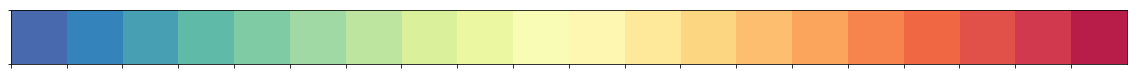

In [19]:
current_palette = sns.color_palette("Spectral_r", 20)
sns.palplot(current_palette)

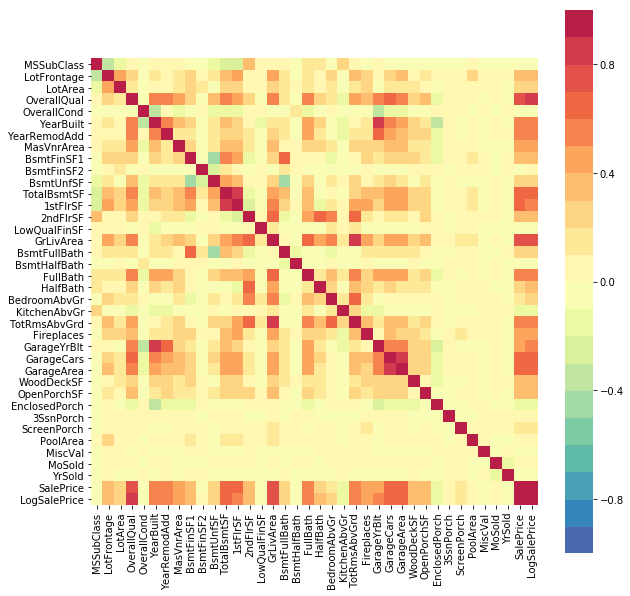

In [20]:
plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax = 1, vmin = -1, square=True, cmap = current_palette)

In [21]:
total = all_data.isnull().sum().sort_values(ascending = False)
percent = (all_data.isnull().sum()/len(all_data)).sort_values(ascending = False)
all_nan = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
all_nan = all_nan.drop(all_nan[all_nan['Total'] == 0].index)
print(len(all_nan))
all_nan.head(8)

34


,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageQual,159,0.054471


In [22]:
all_nan.tail(3)

,Total,Percent
KitchenQual,1,0.000343
GarageArea,1,0.000343
GarageCars,1,0.000343


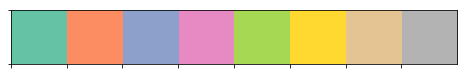

In [23]:
current_palette = sns.color_palette("Set2", 8)
sns.palplot(current_palette)

Text(0.5,1,'Missing percentage by feature')

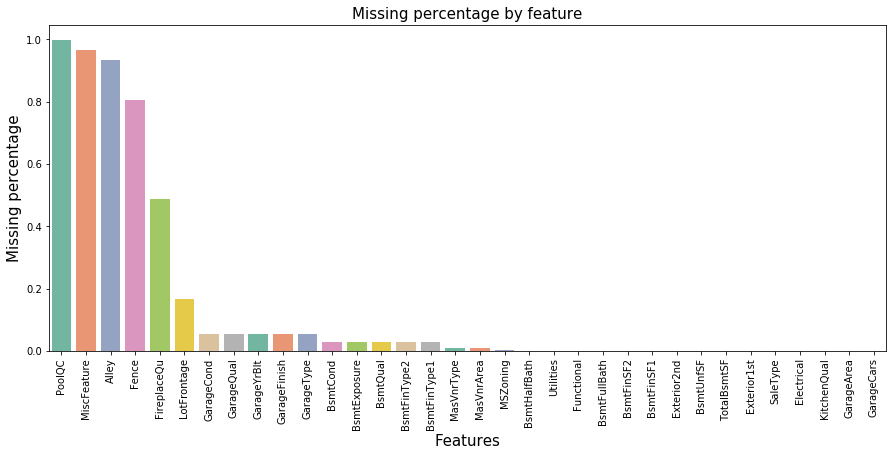

In [24]:
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x = all_nan.index, y = all_nan['Percent'], palette = current_palette)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Missing percentage', fontsize=15)
plt.title('Missing percentage by feature', fontsize=15)

In [25]:
all_nan.index.values

array(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage', 'GarageCond', 'GarageQual', 'GarageYrBlt',
       'GarageFinish', 'GarageType', 'BsmtCond', 'BsmtExposure',
       'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType',
       'MasVnrArea', 'MSZoning', 'BsmtHalfBath', 'Utilities',
       'Functional', 'BsmtFullBath', 'BsmtFinSF2', 'BsmtFinSF1',
       'Exterior2nd', 'BsmtUnfSF', 'TotalBsmtSF', 'Exterior1st',
       'SaleType', 'Electrical', 'KitchenQual', 'GarageArea',
       'GarageCars'], dtype=object)

In [26]:
# 1

# all_data = all_data.drop(['Utilities'], axis=1)
all_data['Utilities'] = all_data['Utilities'].fillna(all_data['Utilities'].mode()[0])

In [27]:
# 15

for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageQual', 'GarageFinish', \
            'GarageType', 'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType'): 
    all_data[col] = all_data[col].fillna('None')

np.sum(all_data[['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', \
                 'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType', 'BsmtCond', \
                 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType']].isnull())

PoolQC          0
MiscFeature     0
Alley           0
Fence           0
FireplaceQu     0
GarageCond      0
GarageQual      0
GarageFinish    0
GarageType      0
BsmtCond        0
BsmtExposure    0
BsmtQual        0
BsmtFinType2    0
BsmtFinType1    0
MasVnrType      0
dtype: int64

In [28]:
# 10

for col in ('GarageYrBlt', 'GarageCars', 'GarageArea', 'BsmtFullBath', 'BsmtFinSF2', 'BsmtFinSF1', \
            'BsmtUnfSF', 'BsmtHalfBath', 'TotalBsmtSF', 'MasVnrArea'): 
    all_data[col] = all_data[col].fillna(0)

np.sum(all_data[['GarageYrBlt', 'GarageCars', 'GarageArea', 'BsmtFullBath', 'BsmtFinSF2', 'BsmtFinSF1', \
                 'BsmtUnfSF', 'BsmtHalfBath', 'TotalBsmtSF', 'MasVnrArea']].isnull())

GarageYrBlt     0
GarageCars      0
GarageArea      0
BsmtFullBath    0
BsmtFinSF2      0
BsmtFinSF1      0
BsmtUnfSF       0
BsmtHalfBath    0
TotalBsmtSF     0
MasVnrArea      0
dtype: int64

In [29]:
total = all_data.isnull().sum().sort_values(ascending = False)
all_nan = pd.DataFrame(total)
all_nan.columns = ['Total']
all_nan = all_nan.drop(all_nan[all_nan['Total'] == 0].index)
print(len(all_nan))
all_nan

8


,Total
LotFrontage,486
MSZoning,4
Functional,2
Exterior1st,1
SaleType,1
Electrical,1
Exterior2nd,1
KitchenQual,1


In [30]:
# 7

for col in ('MSZoning', 'Functional', 'Exterior1st', 'Exterior2nd', 'Electrical', 'KitchenQual', 'SaleType'): 
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

np.sum(all_data[['MSZoning', 'Functional', 'Exterior1st', 'Exterior2nd', \
                 'Electrical', 'KitchenQual', 'SaleType']].isnull())

MSZoning       0
Functional     0
Exterior1st    0
Exterior2nd    0
Electrical     0
KitchenQual    0
SaleType       0
dtype: int64

In [31]:
total = all_data.isnull().sum().sort_values(ascending = False)
all_nan = pd.DataFrame(total)
all_nan.columns = ['Total']
all_nan = all_nan.drop(all_nan[all_nan['Total'] == 0].index)
print(len(all_nan))
all_nan

1


,Total
LotFrontage,486


#### 2.2 Categorical features: Label encoding

In [32]:
all_data.shape

(2919, 79)

In [33]:
all_data[all_data['BsmtFinSF1'] >= all_data['BsmtFinSF1']].shape

(2919, 79)

In [34]:
all_data.select_dtypes(exclude=['object']).columns # 33, yes

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

So keep those 33 numeric columns as they were, 
```
['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', \
 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', \
 '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', \
 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', \
 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', \
 '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], 33
```
except ```'MSSubClass', 'MoSold', 'YrSold'```:

In [62]:
# col = 'MSSubClass'
# data = train_df[[col, 'SalePrice']]
# data.groupby(col).mean().sort_values('SalePrice')

In [28]:
# col = 'MoSold'
# data = train_df[[col, 'SalePrice']]
# data.groupby(col).mean().sort_values('SalePrice')

In [29]:
# col = 'YrSold'
# data = train_df[[col, 'SalePrice']]
# data.groupby(col).mean().sort_values('SalePrice')

In [36]:
all_data = all_data.replace({
    'MSSubClass': {'30': 0, '180': 1, '45': 2, '190': 3, '90': 4, '160': 5, '50': 6, '85': 7, \
                   '40': 8, '70': 9, '80': 10, '20': 11, '75': 12, '120': 13, '60': 14, '150': 5}, 
    'MoSold': {'4': 0, '5': 1, '6': 2, '2': 3, '10': 4, '3': 5, \
               '1': 6, '8': 7, '7': 8, '12': 9, '11': 10, '9': 11}, 
    'YrSold': {'2008': 0, '2010': 1, '2009': 2, '2006': 3, '2007': 4}
})

all_data[['MSSubClass', 'MoSold', 'YrSold']].dtypes

MSSubClass    int64
MoSold        int64
YrSold        int64
dtype: object

In [37]:
all_data.select_dtypes(include=['object']).columns # 43

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

Among these 43, convert those 25 with ordinal numbers
```
'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'ExterQual', \
'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', \
'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', \
'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence'
```

In [38]:
# 24

all_data = all_data.replace({
    'Street': {'Grvl': 0, 'Pave': 1}, 
    'Alley': {'None': 0, 'Grvl': 1, 'Pave': 2}, 
    'LotShape': {'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3}, 
    'LandContour': {'Low': 0, 'HLS': 1, 'Bnk': 2, 'Lvl': 3}, 
    'Utilities': {'NoSeWa': 0, 'AllPub': 1}, 
    'LandSlope': {'Sev': 0, 'Mod': 1, 'Gtl': 2}, 
    'ExterQual': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}, 
    'ExterCond': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}, 
    'BsmtQual': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, 
    'BsmtCond': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, 
    'BsmtExposure': {'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}, 
    'BsmtFinType1': {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}, 
    'BsmtFinType2': {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}, 
    'HeatingQC': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}, 
    'CentralAir': {'N': 0, 'Y': 1}, 
    'Electrical': {'Mix': 0, 'FuseP': 0, 'FuseF': 1, 'FuseA': 2, 'SBrkr': 3}, 
    'KitchenQual': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}, 
    'Functional': {'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ': 7}, 
    'FireplaceQu': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, 
    'GarageFinish': {'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}, 
    'GarageQual': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, 
    'GarageCond': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, 
    'PavedDrive': {'N': 0, 'P': 1, 'Y': 2}, 
    'PoolQC': {'None': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}, 
    'Fence': {'None': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}
})

all_data[['Street', 'Alley', 'LotShape', 'LandContour', 'LandSlope', 'ExterQual', \
          'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', \
          'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', \
          'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']].dtypes

Street          int64
Alley           int64
LotShape        int64
LandContour     int64
LandSlope       int64
ExterQual       int64
ExterCond       int64
BsmtQual        int64
BsmtCond        int64
BsmtExposure    int64
BsmtFinType1    int64
BsmtFinType2    int64
HeatingQC       int64
CentralAir      int64
Electrical      int64
KitchenQual     int64
Functional      int64
FireplaceQu     int64
GarageFinish    int64
GarageQual      int64
GarageCond      int64
PavedDrive      int64
PoolQC          int64
Fence           int64
dtype: object

Last 18 categorical: Need to see how they related to the SalePrice
```
['MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', \
'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', \
'Foundation', 'Heating', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition'], 18
```

In [98]:
# col = 'MSZoning'
# data = train_df[[col, 'SalePrice']]
# data.groupby(col).mean().sort_values('SalePrice')

,SalePrice
MSZoning,
C (all),74528.000000
RM,126316.830275
RH,131558.375000
RL,191004.994787
FV,214014.061538


In [39]:
# 18

all_data = all_data.replace({
    'MSZoning': {'C (all)': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4}, 
    'LotConfig': {'Inside': 0, 'FR2': 1, 'Corner': 2, 'FR3': 3, 'CulDSac': 4}, 
    'Neighborhood': {'MeadowV': 0, 'IDOTRR': 1, 'BrDale': 2, 'BrkSide': 3, 'Edwards': 4, 'OldTown': 5, \
                     'Sawyer': 6, 'Blueste': 7, 'SWISU': 8, 'NPkVill': 9, 'NAmes': 10, \
                     'Mitchel': 11, 'SawyerW': 12, 'NWAmes': 13, 'Gilbert': 14, 'Blmngtn': 15, \
                     'CollgCr': 16, 'Crawfor': 17, 'ClearCr': 18, 'Somerst': 19, 'Veenker': 20, \
                     'Timber': 21, 'StoneBr': 22, 'NridgHt': 23, 'NoRidge': 24}, 
    'Condition1': {'Artery': 0, 'RRAe': 1, 'Feedr': 2, 'RRAn': 3, 'Norm': 4, 'RRNe': 5, 'RRNn': 6, 'PosN': 7, 'PosA': 8}, 
    'Condition2': {'RRNn': 0, 'Artery': 1, 'Feedr': 2, 'RRAn': 3, 'Norm': 4, 'RRAe': 5, 'PosN': 6, 'PosA': 7}, 
    'BldgType': {'2fmCon': 0, 'Duplex': 1, 'Twnhs': 2, 'TwnhsE': 3, '1Fam': 4}, 
    'HouseStyle': {'1.5Unf': 0, 'SFoyer': 1, '1.5Fin': 2, '2.5Unf': 3, 'SLvl': 4, '1Story': 5, '2Story': 6, '2.5Fin': 7}, 
    'RoofStyle': {'Gambrel': 0, 'Gable': 1, 'Mansard': 2, 'Flat': 3, 'Hip': 4, 'Shed': 5}, 
    'RoofMatl': {'Roll': 0, 'ClyTile': 1, 'CompShg': 2, 'Metal': 3, 'Tar&Grv': 4, 'WdShake': 5, 'Membran': 6, 'WdShngl': 7}, 
    'Exterior1st': {'BrkComm': 0, 'AsphShn': 1, 'CBlock': 2, 'AsbShng': 3, 'MetalSd': 4, 'Wd Sdng': 5, \
                    'WdShing': 6, 'Stucco': 7, 'HdBoard': 8, 'Plywood': 9, 'BrkFace': 10, 'VinylSd': 11, \
                    'CemntBd': 12, 'Stone': 13, 'ImStucc': 14}, 
    'Exterior2nd': {'CBlock': 0, 'AsbShng': 1, 'Brk Cmn': 2, 'AsphShn': 3, 'Wd Sdng': 4, 'MetalSd': 5, \
                    'Stucco': 6, 'Stone': 7, 'Wd Shng': 4, 'HdBoard': 8, 'Plywood': 9, 'BrkFace': 10, \
                    'VinylSd': 11, 'CmentBd': 12, 'ImStucc': 13, 'Other': 14}, 
    'MasVnrType': {'BrkCmn': 0, 'None': 1, 'BrkFace': 2, 'Stone': 3}, 
    'Foundation': {'Slab': 0, 'BrkTil': 1, 'CBlock': 2, 'Stone': 3, 'Wood': 4, 'PConc': 5}, 
    'Heating': {'Floor': 0, 'Grav': 1, 'Wall': 2, 'OthW': 3, 'GasW': 4, 'GasA': 5}, 
    'GarageType': {'None': 0, 'CarPort': 1, 'Detchd': 2, '2Types': 3, 'Basment': 4, 'Attchd': 5, 'BuiltIn': 6}, 
    'MiscFeature': {'None': 0, 'Othr': 1, 'Shed': 2, 'Gar2': 3, 'TenC': 4}, 
    'SaleType': {'Oth': 0, 'ConLD': 1, 'ConLw': 2, 'COD': 3, 'WD': 4, 'ConLI': 5, 'CWD': 6, 'Con': 7, 'New': 8}, 
    'SaleCondition': {'AdjLand': 0, 'Abnorml': 1, 'Family': 2, 'Alloca': 3, 'Normal': 4, 'Partial': 5}
})

all_data[['MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', \
          'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', \
          'Foundation', 'Heating', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']].dtypes

MSZoning         int64
LotConfig        int64
Neighborhood     int64
Condition1       int64
Condition2       int64
BldgType         int64
HouseStyle       int64
RoofStyle        int64
RoofMatl         int64
Exterior1st      int64
Exterior2nd      int64
MasVnrType       int64
Foundation       int64
Heating          int64
GarageType       int64
MiscFeature      int64
SaleType         int64
SaleCondition    int64
dtype: object

In [40]:
all_data.select_dtypes(include=['object']).columns  # good

Index([], dtype='object')

In [41]:
from fancyimpute import KNN, MICE

Using TensorFlow backend.


In [73]:
lf_filled_knn = pd.DataFrame(KNN(3).complete(all_data), columns=all_data.columns, index=all_data.index)
lf_filled_knn.shape

Imputing row 1/2919 with 0 missing, elapsed time: 4.632
Imputing row 101/2919 with 1 missing, elapsed time: 4.632
Imputing row 201/2919 with 0 missing, elapsed time: 4.632
Imputing row 301/2919 with 0 missing, elapsed time: 4.632
Imputing row 401/2919 with 0 missing, elapsed time: 4.632
Imputing row 501/2919 with 0 missing, elapsed time: 4.632
Imputing row 601/2919 with 0 missing, elapsed time: 4.632
Imputing row 701/2919 with 0 missing, elapsed time: 4.648
Imputing row 801/2919 with 0 missing, elapsed time: 4.648
Imputing row 901/2919 with 1 missing, elapsed time: 4.648
Imputing row 1001/2919 with 0 missing, elapsed time: 4.648
Imputing row 1101/2919 with 0 missing, elapsed time: 4.648
Imputing row 1201/2919 with 0 missing, elapsed time: 4.648
Imputing row 1301/2919 with 1 missing, elapsed time: 4.648
Imputing row 1401/2919 with 0 missing, elapsed time: 4.648
Imputing row 1501/2919 with 1 missing, elapsed time: 4.648
Imputing row 1601/2919 with 0 missing, elapsed time: 4.648
Imputing 

(2919, 79)

In [43]:
np.sum(lf_filled_knn[['LotFrontage']].isnull())

LotFrontage    0
dtype: int64

In [44]:
total = lf_filled_knn.isnull().sum().sort_values(ascending = False)
all_nan = pd.DataFrame(total)
all_nan.columns = ['Total']
all_nan = all_nan.drop(all_nan[all_nan['Total'] == 0].index)
print(len(all_nan))
all_nan

0


,Total


In [45]:
lf_filled_mice = pd.DataFrame(MICE().complete(all_data), columns=all_data.columns, index=all_data.index)
lf_filled_mice.shape

[MICE] Completing matrix with shape (2919, 79)
[MICE] Starting imputation round 1/110, elapsed time 0.121
[MICE] Starting imputation round 2/110, elapsed time 0.694
[MICE] Starting imputation round 3/110, elapsed time 0.714
[MICE] Starting imputation round 4/110, elapsed time 0.722
[MICE] Starting imputation round 5/110, elapsed time 0.731
[MICE] Starting imputation round 6/110, elapsed time 0.740
[MICE] Starting imputation round 7/110, elapsed time 0.752
[MICE] Starting imputation round 8/110, elapsed time 0.764
[MICE] Starting imputation round 9/110, elapsed time 0.773
[MICE] Starting imputation round 10/110, elapsed time 0.782
[MICE] Starting imputation round 11/110, elapsed time 0.791
[MICE] Starting imputation round 12/110, elapsed time 0.802
[MICE] Starting imputation round 13/110, elapsed time 0.811
[MICE] Starting imputation round 14/110, elapsed time 0.819
[MICE] Starting imputation round 15/110, elapsed time 0.826
[MICE] Starting imputation round 16/110, elapsed time 0.834
[M

(2919, 79)

In [46]:
np.sum(lf_filled_mice[['LotFrontage']].isnull())

LotFrontage    0
dtype: int64

In [47]:
total = lf_filled_mice.isnull().sum().sort_values(ascending = False)
all_nan = pd.DataFrame(total)
all_nan.columns = ['Total']
all_nan = all_nan.drop(all_nan[all_nan['Total'] == 0].index)
print(len(all_nan))
all_nan

0


,Total


C:\Users\Xu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


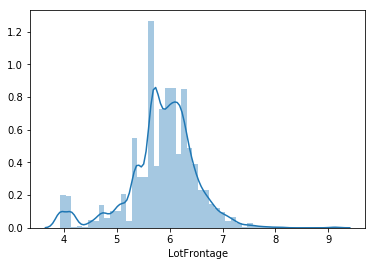

In [48]:
no_nan_all_data = all_data.dropna()
sns.distplot(no_nan_all_data['LotFrontage'])

C:\Users\Xu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


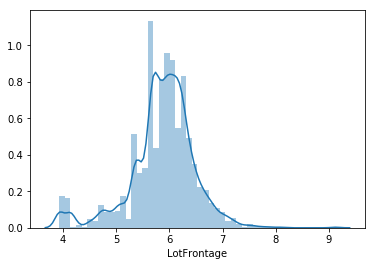

In [49]:
sns.distplot(lf_filled_knn['LotFrontage'])

C:\Users\Xu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


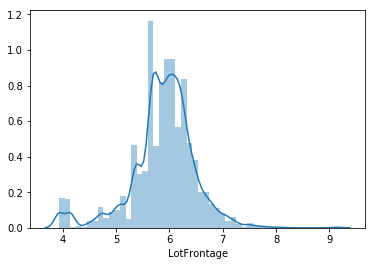

In [50]:
sns.distplot(lf_filled_mice['LotFrontage'])

For now, use KNN imputation results:

In [51]:
corrmat = lf_filled_knn.corr()
corr = corrmat.unstack()
corr = corr.sort_values(ascending = False)
corr.tail(10)

LotShape       LotArea         -0.330623
LotArea        LotShape        -0.330623
BsmtUnfSF      BsmtFinSF1      -0.344426
BsmtFinSF1     BsmtUnfSF       -0.344426
1stFlrSF       2ndFlrSF        -0.383894
2ndFlrSF       1stFlrSF        -0.383894
YearBuilt      EnclosedPorch   -0.463587
EnclosedPorch  YearBuilt       -0.463587
BldgType       KitchenAbvGr    -0.631194
KitchenAbvGr   BldgType        -0.631194
dtype: float64

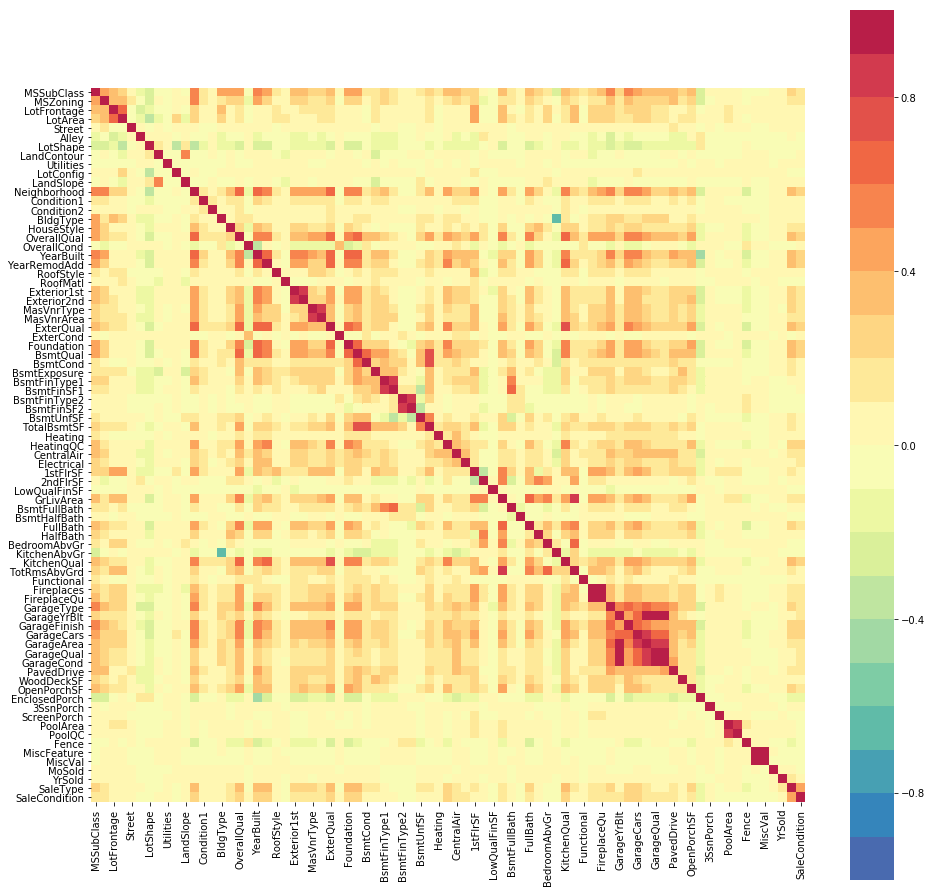

In [52]:
current_palette = sns.color_palette("Spectral_r", 20)
plt.subplots(figsize=(16, 16))
sns.heatmap(corrmat, vmax = 1, vmin = -1, square=True, cmap = current_palette)

#### 2.3 Convert and save to csv

In [54]:
print(train_df.shape)
print(test_df.shape)
print(all_data.shape)

(1460, 81)
(1459, 79)
(2919, 79)


In [55]:
ntrain = train_df.shape[0]
ntest = test_df.shape[0]

In [64]:
lf_filled_knn[:ntrain].to_csv('./data/X_train_00.csv', index=False)
lf_filled_knn[ntrain:].to_csv('./data/X_test_00.csv', index=False)
y_train.to_csv('./data/y_train_00_log.csv', index=False)
y_train0.to_csv('./data/y_train_00_origin.csv', index=False)

In [65]:
X_train = lf_filled_knn[:ntrain]

### 3. Linear Regression

In [59]:
import sklearn.model_selection as ms
from sklearn import linear_model

In [70]:
ols = linear_model.LinearRegression()

In [71]:
ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
ols.score(X_train, y_train)

0.9101059532351975